In [ ]:
import torch
import torchvision
n_epochs = 3
batch_size_train = 64
batch_size_test = 1000
learning_rate = 0.01
momentum = 0.5
log_interval = 10

random_seed = 1
torch.backends.cudnn.enabled = False
torch.manual_seed(random_seed)

train_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=True, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_train, shuffle=True)

test_loader = torch.utils.data.DataLoader(
  torchvision.datasets.MNIST('/files/', train=False, download=True,
                             transform=torchvision.transforms.Compose([
                               torchvision.transforms.ToTensor(),
                               torchvision.transforms.Normalize(
                                 (0.1307,), (0.3081,))
                             ])),
  batch_size=batch_size_test, shuffle=True)

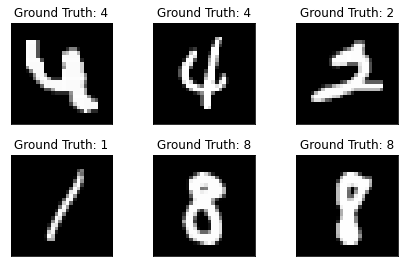

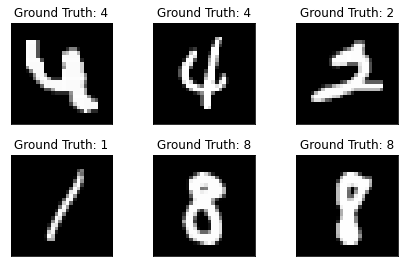

In [ ]:
examples = enumerate(test_loader)
batch_idx, (example_data, example_targets) = next(examples)
import matplotlib.pyplot as plt

fig = plt.figure()
for i in range(6):
  plt.subplot(2,3,i+1)
  plt.tight_layout()
  plt.imshow(example_data[i][0], cmap='gray', interpolation='none')
  plt.title("Ground Truth: {}".format(example_targets[i]))
  plt.xticks([])
  plt.yticks([])
fig

In [ ]:
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = (F.max_pool2d(self.conv1(x), 2))
        x = (F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = (self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
        return F.log_softmax(x)

In [ ]:
network = Net()
optimizer = optim.SGD(network.parameters(), lr=learning_rate,
                      momentum=momentum)

In [ ]:
train_losses = []
train_counter = []
test_losses = []
test_counter = [i*len(train_loader.dataset) for i in range(n_epochs + 1)]

def train(epoch):
  network.train()
  for batch_idx, (data, target) in enumerate(train_loader):
    optimizer.zero_grad()
    output = network(data)
    loss = F.nll_loss(output, target)
    loss.backward()
    optimizer.step()
    if batch_idx % log_interval == 0:
      print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
        epoch, batch_idx * len(data), len(train_loader.dataset),
        100. * batch_idx / len(train_loader), loss.item()))
      train_losses.append(loss.item())
      train_counter.append(
        (batch_idx*64) + ((epoch-1)*len(train_loader.dataset)))
    #   torch.save(network.state_dict(), '/results/model.pth')
    #   torch.save(optimizer.state_dict(), '/results/optimizer.pth')

def test():
  network.eval()
  test_loss = 0
  correct = 0
  with torch.no_grad():
    for data, target in test_loader:
      output = network(data)
      test_loss += F.nll_loss(output, target, size_average=False).item()
      pred = output.data.max(1, keepdim=True)[1]
      correct += pred.eq(target.data.view_as(pred)).sum()
  test_loss /= len(test_loader.dataset)
  test_losses.append(test_loss)
  print('\nTest set: Avg. loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
    test_loss, correct, len(test_loader.dataset),
    100. * correct / len(test_loader.dataset)))

train(3)

test()
for epoch in range(1, n_epochs + 1):
  train(epoch)
  test()

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:21: UserWarning: Implicit dimension choice for log_softmax has been deprecated. Change the call to include dim=X as an argument.


Train Epoch: 3 [0/60000 (0%)]	Loss: 2.388554
Train Epoch: 3 [640/60000 (1%)]	Loss: 2.230180
Train Epoch: 3 [1280/60000 (2%)]	Loss: 2.156425
Train Epoch: 3 [1920/60000 (3%)]	Loss: 2.027305
Train Epoch: 3 [2560/60000 (4%)]	Loss: 1.922304
Train Epoch: 3 [3200/60000 (5%)]	Loss: 1.528308
Train Epoch: 3 [3840/60000 (6%)]	Loss: 1.180466
Train Epoch: 3 [4480/60000 (7%)]	Loss: 1.300505
Train Epoch: 3 [5120/60000 (9%)]	Loss: 0.879208
Train Epoch: 3 [5760/60000 (10%)]	Loss: 1.206799
Train Epoch: 3 [6400/60000 (11%)]	Loss: 0.977496
Train Epoch: 3 [7040/60000 (12%)]	Loss: 0.940336
Train Epoch: 3 [7680/60000 (13%)]	Loss: 0.761684
Train Epoch: 3 [8320/60000 (14%)]	Loss: 1.142246
Train Epoch: 3 [8960/60000 (15%)]	Loss: 0.774552
Train Epoch: 3 [9600/60000 (16%)]	Loss: 0.457978
Train Epoch: 3 [10240/60000 (17%)]	Loss: 0.992451
Train Epoch: 3 [10880/60000 (18%)]	Loss: 0.719077
Train Epoch: 3 [11520/60000 (19%)]	Loss: 0.610536
Train Epoch: 3 [12160/60000 (20%)]	Loss: 0.600062
Train Epoch: 3 [12800/60000 (

/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Avg. loss: 0.1514, Accuracy: 9565/10000 (96%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.344210
Train Epoch: 1 [640/60000 (1%)]	Loss: 0.304005
Train Epoch: 1 [1280/60000 (2%)]	Loss: 0.322057
Train Epoch: 1 [1920/60000 (3%)]	Loss: 0.265854
Train Epoch: 1 [2560/60000 (4%)]	Loss: 0.364167
Train Epoch: 1 [3200/60000 (5%)]	Loss: 0.414195
Train Epoch: 1 [3840/60000 (6%)]	Loss: 0.113304
Train Epoch: 1 [4480/60000 (7%)]	Loss: 0.194876
Train Epoch: 1 [5120/60000 (9%)]	Loss: 0.336731
Train Epoch: 1 [5760/60000 (10%)]	Loss: 0.214550
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.121635
Train Epoch: 1 [7040/60000 (12%)]	Loss: 0.330265
Train Epoch: 1 [7680/60000 (13%)]	Loss: 0.403475
Train Epoch: 1 [8320/60000 (14%)]	Loss: 0.238208
Train Epoch: 1 [8960/60000 (15%)]	Loss: 0.276637
Train Epoch: 1 [9600/60000 (16%)]	Loss: 0.302382
Train Epoch: 1 [10240/60000 (17%)]	Loss: 0.405745
Train Epoch: 1 [10880/60000 (18%)]	Loss: 0.211030
Train Epoch: 1 [11520/60000 (19%)]	Loss: 0.373594
Train Epoch: 1 [12160

Extracting ./data/MNIST/raw/train-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/train-labels-idx1-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-images-idx3-ubyte.gz to ./data/MNIST/raw


Extracting ./data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ./data/MNIST/raw
Processing...
Done!


/usr/local/lib/python3.6/dist-packages/torchvision/datasets/mnist.py:480: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  /pytorch/torch/csrc/utils/tensor_numpy.cpp:141.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


Extracting ./MNIST/raw/train-images-idx3-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/train-labels-idx1-ubyte.gz to ./MNIST/raw


Extracting ./MNIST/raw/t10k-images-idx3-ubyte.gz to ./MNIST/raw





Extracting ./MNIST/raw/t10k-labels-idx1-ubyte.gz to ./MNIST/raw
Processing...
Done!
torch.Size([64, 1, 28, 28])
torch.Size([64])


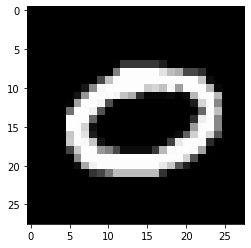

In [ ]:
# importing the libraries
import numpy as np
import torch
import torchvision
import matplotlib.pyplot as plt
from time import time
from torchvision import datasets, transforms
from torch import nn, optim
# transformations to be applied on images
transform = transforms.Compose([transforms.ToTensor(),
                              transforms.Normalize((0.5,), (0.5,)),
                              ])
# defining the training and testing set
trainset = datasets.MNIST('./data', download=True, train=True, transform=transform)
testset = datasets.MNIST('./', download=True, train=False, transform=transform)
# defining trainloader and testloader
trainloader = torch.utils.data.DataLoader(trainset, batch_size=64, shuffle=True)
testloader = torch.utils.data.DataLoader(testset, batch_size=64, shuffle=True)
# shape of training data
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)
# visualizing the training images
plt.imshow(images[0].numpy().squeeze(), cmap='gray')

In [ ]:

# shape of validation data
dataiter = iter(testloader)
images, labels = dataiter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


In [ ]:
# simply define a silu function
def silu(input):
    '''
    Applies the Sigmoid Linear Unit (SiLU) function element-wise:
        SiLU(x) = x * sigmoid(x)
    '''
    input_shape = input.shape[0]
    even_indices = [i for i in range(0, input_shape, 2)]
    # odd_indices = [i for i in range(1, input_shape, 2)]

    # clone the input tensor
    output = input.clone()

    # apply ReLU to elements where i mod 2 == 0
    output[even_indices] = output[even_indices].clamp(min=0)

    # apply inversed ReLU to inversed elements where i mod 2 != 0
    # output[odd_indices] = output[odd_indices] # reverse elements with odd indices
    # output[odd_indices] = - output[odd_indices].clamp(min = 0) # apply reversed ReLU

    return output

# create a class wrapper from PyTorch nn.Module, so
# the function now can be easily used in models
class SiLU(nn.Module):
    def __init__(self):
        super().__init__() # init the base class

    def forward(self, input):
        return silu(input) # simply apply already implemented SiLU

In [ ]:
# defining the model architecture
# brelu_activation = brelu.apply
class Net(nn.Module):   
  def __init__(self):
      super(Net, self).__init__()

      self.cnn_layers = nn.Sequential(
          # Defining a 2D convolution layer
          nn.Conv2d(1, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
        #   nn.ReLU(inplace=True),
        #   SiLU(),
          nn.Sigmoid(),
          nn.AvgPool2d(kernel_size=2, stride=2),
          # Defining another 2D convolution layer
          nn.Conv2d(4, 4, kernel_size=3, stride=1, padding=1),
          nn.BatchNorm2d(4),
        #   nn.ReLU(inplace=True),
        #   SiLU(),
          nn.Sigmoid(),
          nn.AvgPool2d(kernel_size=2, stride=2),
      )

      self.linear_layers = nn.Sequential(
          nn.Linear(4 * 7 * 7, 10)
      )

  # Defining the forward pass    
  def forward(self, x):
      x = self.cnn_layers(x)
      x = x.view(x.size(0), -1)
      x = self.linear_layers(x)
      return x


# defining the model
model = Net()
# defining the optimizer
optimizer = optim.Adam(model.parameters(), lr=0.01)
# defining the loss function
criterion = nn.CrossEntropyLoss()
# checking if GPU is available
if torch.cuda.is_available():
    model = model.cuda()
    criterion = criterion.cuda()
    
print(model)

Net(
  (cnn_layers): Sequential(
    (0): Conv2d(1, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): Sigmoid()
    (3): AvgPool2d(kernel_size=2, stride=2, padding=0)
    (4): Conv2d(4, 4, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(4, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): Sigmoid()
    (7): AvgPool2d(kernel_size=2, stride=2, padding=0)
  )
  (linear_layers): Sequential(
    (0): Linear(in_features=196, out_features=10, bias=True)
  )
)


In [ ]:
for i in range(35):
    running_loss = 0
    for images, labels in trainloader:

        if torch.cuda.is_available():
          images = images.cuda()
          labels = labels.cuda()

        # Training pass
        optimizer.zero_grad()
        
        output = model(images)
        loss = criterion(output, labels)
        
        #This is where the model learns by backpropagating
        loss.backward()
        
        #And optimizes its weights here
        optimizer.step()
        
        running_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(i+1, running_loss/len(trainloader)))

Epoch 1 - Training loss: 0.3813409613830639
Epoch 2 - Training loss: 0.1272140174780462
Epoch 3 - Training loss: 0.10274356556460579
Epoch 4 - Training loss: 0.09174371748191636
Epoch 5 - Training loss: 0.08370695074648857
Epoch 6 - Training loss: 0.078230325558058
Epoch 7 - Training loss: 0.07250545523874065
Epoch 8 - Training loss: 0.06890586729514907
Epoch 9 - Training loss: 0.06768392248780154
Epoch 10 - Training loss: 0.0633546162341068
Epoch 11 - Training loss: 0.06187230483643703
Epoch 12 - Training loss: 0.05984373082260865
Epoch 13 - Training loss: 0.05884567130682692
Epoch 14 - Training loss: 0.05628308536534978
Epoch 15 - Training loss: 0.05588559975819305
Epoch 16 - Training loss: 0.054167469704537584
Epoch 17 - Training loss: 0.05357389728243806
Epoch 18 - Training loss: 0.053190830357331555
Epoch 19 - Training loss: 0.05236294252491657
Epoch 20 - Training loss: 0.050301486397284205
Epoch 21 - Training loss: 0.05096357597521187
Epoch 22 - Training loss: 0.04990404545662623

In [ ]:
 # getting predictions on test set and measuring the performance

correct_count, all_count = 0, 0
for images,labels in trainloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Training Accuracy =", (correct_count/all_count))


correct_count, all_count = 0, 0
for images,labels in testloader:
  for i in range(len(labels)):
    if torch.cuda.is_available():
        images = images.cuda()
        labels = labels.cuda()
    img = images[i].view(1, 1, 28, 28)
    with torch.no_grad():
        logps = model(img)

    
    ps = torch.exp(logps)
    probab = list(ps.cpu()[0])
    pred_label = probab.index(max(probab))
    true_label = labels.cpu()[i]
    if(true_label == pred_label):
      correct_count += 1
    all_count += 1

print("Number Of Images Tested =", all_count)
print("\nModel Accuracy =", (correct_count/all_count))
# 0.9389 with relu , loss = 0.036
# 0.9228 , loss = 0.274
# 0.9286 , loss = 0.071

# 0.9536, 0.9531 with relu , l = 0.038
# 0.9698, 0.9696 0.5relu , l = 0.197
# 0.9266, 0.9245, l = 0.275

Number Of Images Tested = 60000

Model Training Accuracy = 0.94655
Number Of Images Tested = 10000

Model Accuracy = 0.9375


tensor(1)
tensor([8.0617e-08, 9.9596e-01, 4.8132e-04, 1.8453e-03, 4.1085e-06, 1.9752e-05,
        1.9773e-10, 1.6509e-03, 3.4988e-05, 3.6822e-07])
tensor(1)


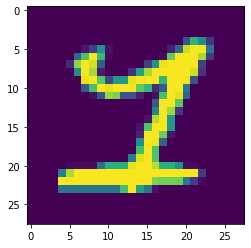

In [ ]:
for images, labels in trainloader:
    a = images[0,0,:,:]
    b = labels[0]
plt.imshow(a)
print(b)
# print(nn.Softmax(model(a.reshape(1,1,28,28))))
res = model(a.reshape(1,1,28,28))[0].detach()
print(np.exp(res)/sum(np.exp(res)))
print(np.argmax(res))